In [3]:
# funkce f,g,h
import numpy as np
def f(x):
    return x**2 -2*x + 1                   

def g(x):
    return 3* np.log(2*x + 1) - 0.5       

def h(x):
    return np.cos(x -np.pi/2) - np.pi/4    

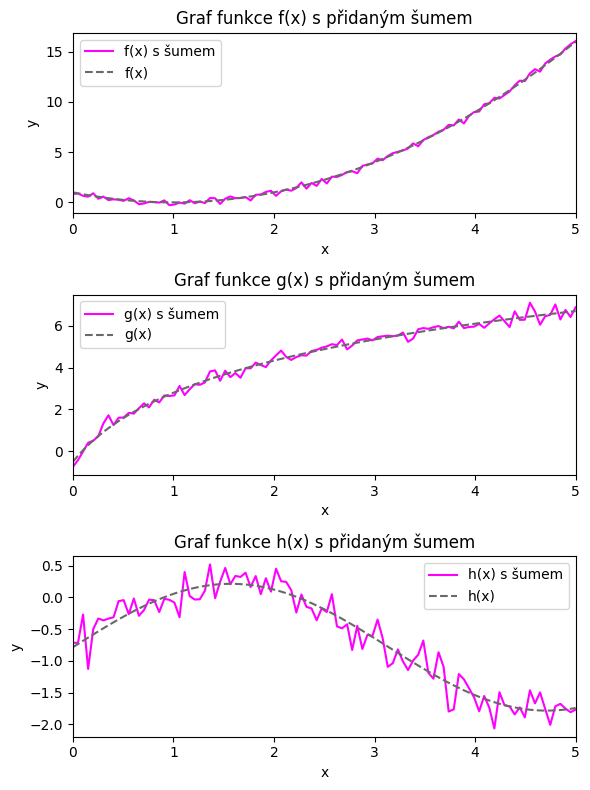

In [5]:
import numpy as np
import matplotlib.pyplot as plt

def add_noise(f, magnitude=0.1):
    def f_noise(x):
        y = f(x)
        noise = np.random.normal(0, magnitude, len(x))  
        y += noise  
        return y
    return f_noise

f_noise = add_noise(f, magnitude=0.2 )
g_noise = add_noise(g, magnitude=0.2 )
h_noise = add_noise(h, magnitude= 0.2)

x_values = np.linspace(0, 5, 100)

plt.figure(figsize=(6,8))

plt.subplot(3, 1, 1)
plt.plot(x_values, f_noise(x_values), color="fuchsia", label="f(x) s šumem")
plt.plot(x_values, f(x_values), color="dimgrey", linestyle="dashed", label="f(x)")
plt.title("Graf funkce f(x) s přidaným šumem")
plt.xlabel("x")
plt.ylabel("y")
plt.xlim(0, 5)  
plt.legend()

plt.subplot(3, 1, 2)
plt.plot(x_values, g_noise(x_values), color="fuchsia", label="g(x) s šumem")
plt.plot(x_values, g(x_values), color="dimgrey", linestyle="dashed", label="g(x)")
plt.title("Graf funkce g(x) s přidaným šumem")
plt.xlabel("x")
plt.ylabel("y")
plt.xlim(0, 5)  
plt.legend()

plt.subplot(3, 1, 3)
plt.plot(x_values, h_noise(x_values), color="fuchsia", label="h(x) s šumem")
plt.plot(x_values, h(x_values), color="dimgrey", linestyle="dashed", label="h(x)")
plt.title("Graf funkce h(x) s přidaným šumem")
plt.xlabel("x")
plt.ylabel("y")
plt.xlim(0, 5)  
plt.legend()

plt.tight_layout()
plt.show()

[-5.         -4.72222222 -4.44444444 -4.16666667 -3.88888889]
[-3.88888889 -3.61111111 -3.33333333 -3.05555556 -2.77777778]
[-2.77777778 -2.5        -2.22222222 -1.94444444 -1.66666667]
[-1.66666667 -1.38888889 -1.11111111 -0.83333333 -0.55555556]
[-0.55555556 -0.27777778  0.          0.27777778  0.55555556]
[0.55555556 0.83333333 1.11111111 1.38888889 1.66666667]
[1.66666667 1.94444444 2.22222222 2.5        2.77777778]
[2.77777778 3.05555556 3.33333333 3.61111111 3.88888889]
[3.88888889 4.16666667 4.44444444 4.72222222 5.        ]


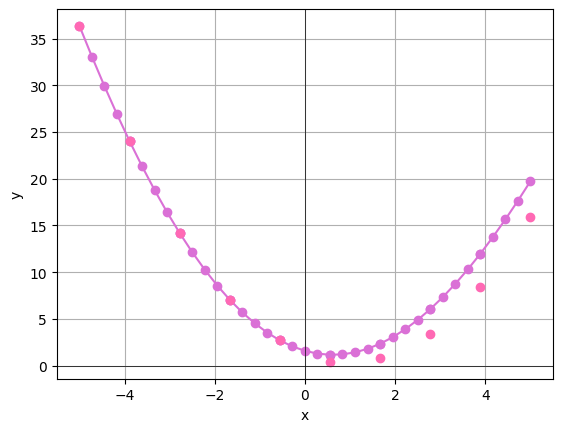

In [11]:
# f
import numpy as np
import matplotlib.pyplot as plt

x = np.linspace(-5,5, 10)  
fx = f_noise(x)  

def lagrangeova_interpolace(x, y, xi, n):
    vysledek = 0  
    for i in range(n):  
        li = y[i] 
        for j in range(n):
            if j != i:
                li = li * (xi - x[j]) / (x[i] - x[j]) 
        vysledek += li  
    return vysledek

nové_x = []  
nové_y = []

počet_bodů_interpolace = 5  

for i in range(len(x) - 1): 
    x_interp = np.linspace(x[i], x[i+1], počet_bodů_interpolace)  
    print(x_interp)  
    g = lagrangeova_interpolace(x, fx, x_interp, počet_bodů_interpolace)
    nové_x.extend(x_interp) 
    nové_y.extend(g)

plt.plot(nové_x, nové_y, "o-",color="orchid")
plt.plot(x, fx, "o",color="hotpink")
plt.xlabel("x")
plt.ylabel("y")
plt.axhline(0, color='black', linewidth=0.5) 
plt.axvline(0, color='black', linewidth=0.5)  
plt.grid()
plt.show()


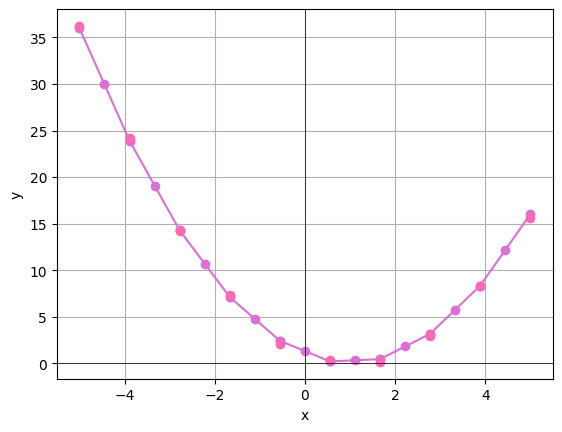

In [12]:
import numpy as np
import matplotlib.pyplot as plt

x = np.linspace(-5,5, 10)  
fx = f_noise(x)  

def linear(x, a, b):
    return f(a) + (f(b)-f(a))/(b-a)*(x-a)

phi = []                                               
xphi = []                                              

ninterpol = 3                                         
for i in range(len(x)-1):                               
    xinterpol = np.linspace(x[i], x[i+1], ninterpol)   
    g = linear(xinterpol, x[i], x[i+1])                
    xphi.extend(xinterpol)                             
    phi.extend(g)                                      
plt.plot(xphi, phi, "o-",color="orchid")                             
plt.plot(x, fx, "o", color="hotpink")  
plt.xlabel("x")
plt.ylabel("y")
plt.axhline(0, color='black', linewidth=0.5)  # Zvýraznění osy x
plt.axvline(0, color='black', linewidth=0.5)  # Zvýraznění osy y                          
plt.grid()
plt.show()

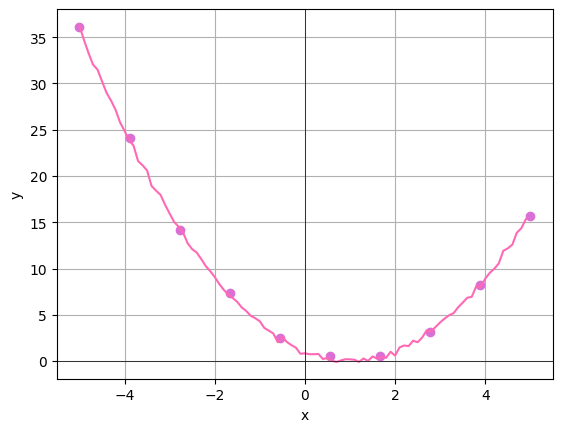

In [14]:
import numpy as np
import matplotlib.pyplot as plt

x = np.linspace(-5,5,10)  
fx = f_noise(x) 

def poměrné_diference(x, y):    
    n = len(y)
    koeficienty = np.zeros([n, n])
    koeficienty[:,0] = y
    for j in range(1, n):
        for i in range(n-j):
            koeficienty[i][j] = (koeficienty[i+1][j-1] - koeficienty[i][j-1]) / (x[i+j]-x[i])
    return koeficienty

def newtonuv_polynom(koeficienty, x_data, x):
    n = len(x_data) - 1 
    p = koeficienty[n]
    for k in range(1, n+1):
        p = koeficienty[n-k] + (x - x_data[n-k])*p
    return p

a_s = poměrné_diference(x, fx)[0, :]
x_nové = np.arange(x[0], x[-1], .1)  
y_nové = newtonuv_polynom(a_s, x, x_nové)  
plt.plot(x, fx, 'o',color="orchid")
plt.plot(x_nové, f_noise(x_nové), color="hotpink")
plt.xlabel("x")
plt.ylabel("y")
plt.axhline(0, color='black', linewidth=0.5)  
plt.axvline(0, color='black', linewidth=0.5)                           
plt.grid()
plt.show()


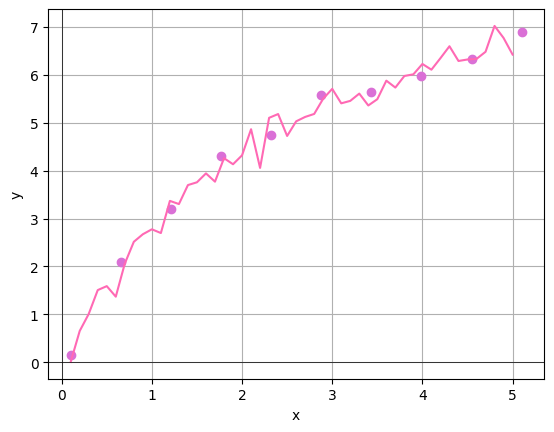

In [15]:
import numpy as np
import matplotlib.pyplot as plt

x = np.linspace(0.1,5.1, 10) 
gx = g_noise(x)  

def poměrné_diference(x, y):    
    n = len(y)
    koeficienty = np.zeros([n, n])
    koeficienty[:,0] = y
    for j in range(1, n):
        for i in range(n-j):
            koeficienty[i][j] = (koeficienty[i+1][j-1] - koeficienty[i][j-1]) / (x[i+j]-x[i])
    return koeficienty

def newtonuv_polynom(koeficienty, x_data, x):
    n = len(x_data) - 1 
    p = koeficienty[n]
    for k in range(1, n+1):
        p = koeficienty[n-k] + (x - x_data[n-k])*p
    return p

a_s = poměrné_diference(x, gx)[0, :]
x_nové = np.arange(x[0], x[-1], .1)  
y_nové = newtonuv_polynom(a_s, x, x_nové)  
plt.plot(x, gx, 'o', color="orchid")
plt.plot(x_nové, g_noise(x_nové),color="hotpink")
plt.xlabel("x")
plt.ylabel("y")
plt.axhline(0, color='black', linewidth=0.5) 
plt.axvline(0, color='black', linewidth=0.5)                          
plt.grid()
plt.show()


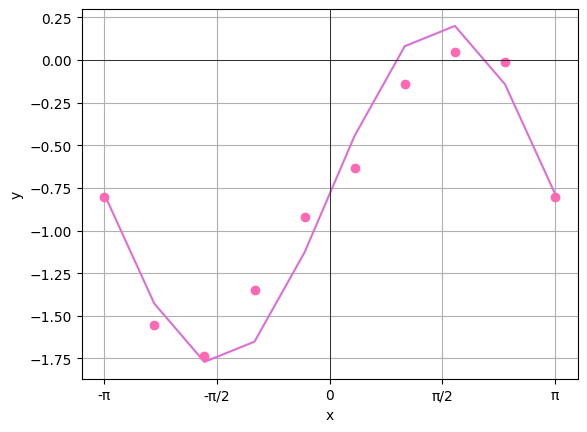

Absolutní odchylka mezi h(0) a interpolovanou hodnotou: 2.892544243589426
Součet čtverců rozdílů (SSE): 0.5448969074799573


In [28]:
import numpy as np
import matplotlib.pyplot as plt

x = np.linspace(-np.pi,np.pi, 10)  
hx = h_noise(x)  

def linear(x, a, b):
    return h(a) + (h(b)-h(a))/(b-a)*(x-a)

phi = []                                               
xphi = []                                              

ninterpol = 2                                           
for i in range(len(x)-1):                              
    xinterpol = np.linspace(x[i], x[i+1], ninterpol)   
    u = linear(xinterpol, x[i], x[i+1])                 
    xphi.extend(xinterpol)                             
    phi.extend(u)                                      

plt.plot(xphi, phi, color="orchid")                              
plt.plot(x, hx, "o",color="hotpink")  
plt.xlabel("x")
plt.ylabel("y")
plt.axhline(0, color='black', linewidth=0.5)  
plt.axvline(0, color='black', linewidth=0.5)     
plt.xticks([-np.pi,-np.pi/2,0,np.pi/2,np.pi],["-π","-π/2","0","π/2","π"])                     
plt.grid()
plt.show()

h_0 = h(0)
h_noise_interpoled_0 = linear(0, x[0], x[1])

abs_odchylka = abs(h_0 - h_noise_interpoled_0)
print("Absolutní odchylka mezi h(0) a interpolovanou hodnotou:", abs_odchylka)

sse = np.sum((np.array(h_noise(x)) - np.array(h(x)))**2)
print("Součet čtverců rozdílů (SSE):", sse)




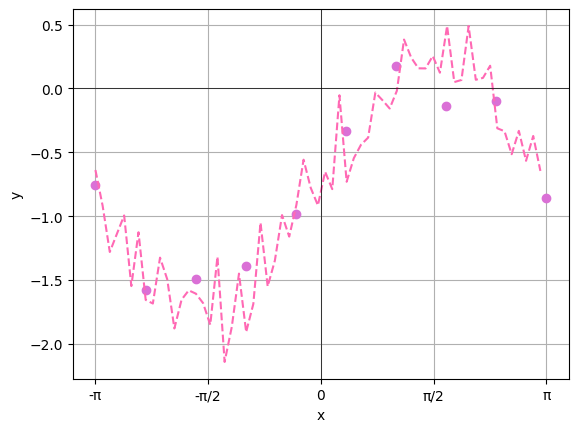

Absolutní odchylka mezi h(0) a interpolovanou hodnotou: 0.10585755765472837
Součet čtverců rozdílů (SSE): 2.5477718200289874


In [30]:
import numpy as np
import matplotlib.pyplot as plt

x = np.linspace(-np.pi,np.pi, 10)  
hx = h_noise(x)  

def poměrné_diference(x, y):    
    n = len(y)
    koeficienty = np.zeros([n, n])
    koeficienty[:,0] = y
    for j in range(1, n):
        for i in range(n-j):
            koeficienty[i][j] = (koeficienty[i+1][j-1] - koeficienty[i][j-1]) / (x[i+j]-x[i])
    return koeficienty

def newtonuv_polynom(koeficienty, x_data, x):
    n = len(x_data) - 1 
    p = koeficienty[n]
    for k in range(1, n+1):
        p = koeficienty[n-k] + (x - x_data[n-k])*p
    return p

a_s = poměrné_diference(x, hx)[0, :]
x_nové = np.arange(x[0], x[-1], .1)  
y_nové = newtonuv_polynom(a_s, x, x_nové)  
plt.plot(x, hx, 'o',color="orchid")
plt.plot(x_nové, h_noise(x_nové), '--', color="hotpink")
plt.xlabel("x")
plt.ylabel("y")
plt.axhline(0, color='black', linewidth=0.5)  
plt.axvline(0, color='black', linewidth=0.5) 
plt.xticks([-np.pi,-np.pi/2,0,np.pi/2,np.pi],["-π","-π/2","0","π/2","π"])                              
plt.grid()
plt.show()

h_0 = h(0)
h_noise_interpoled_0 = newtonuv_polynom(a_s, x, [0])[0]

abs_odchylka = abs(h_0 - h_noise_interpoled_0)
print("Absolutní odchylka mezi h(0) a interpolovanou hodnotou:", abs_odchylka)

sse = np.sum((np.array(h_noise(x_nové)) - np.array(h(x_nové)))**2)
print("Součet čtverců rozdílů (SSE):", sse)